In [32]:
from __future__ import division, print_function, absolute_import

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from pandas import DataFrame
from numpy import ndarray,random

np.random.seed(2)

In [33]:
#function to normalize data
def normalize(x):
    
    for i in range(x.shape[0]):
       for j in range(x.shape[1]):
            x[i][j]=x[i][j]
    x=x.astype(float)
    maxnorm= [np.amax(x[:,j])  if (j in range(x.shape[1]))==True else 1 for j in range(x.shape[1])]
    minnorm= [np.amin(x[:,j])  if (j in range(x.shape[1]))== True else 0 for j in range(x.shape[1])]
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j]=(x[i][j]- minnorm[j])/(maxnorm[j]-minnorm[j])
    return x
            

In [ ]:
#performs bootstrap of a matrix of datapoints
def bootstrap(x,boot_size):
    if boot_size==0:
        return x
    else:
        s=np.random.randint(0,x.shape[0]-1,boot_size)
        s=np.asarray(s)
        w=np.asarray([x[s[i],:] for i in range(s.shape[0])])
       
        return w

In [34]:
#extract seismic data and preprocessing
banknote=pd.read_csv('banknote_auth.csv')

#input data
X=banknote.iloc[:,0:4]
print(X.shape)
#training output
y= banknote.iloc[:,4]
y=np.asarray(y)
y.shape
y=np.transpose(y)
y=np.ravel(y)

X=np.asarray(X)

#normalize data

from sklearn import preprocessing

X=preprocessing.scale(X)
X=normalize(X)
#extract class 1 data from training set
hazardous = [X[i,:] for i in range(X.shape[0]) if y[i] ==1]
hazards=np.asarray(hazardous)
print(hazards.shape)

#extract class 0 data from training set
non_hazardous = [X[i,:] for i in range(X.shape[0]) if y[i] ==0]
non_hazardous=np.asarray(non_hazardous)
print(non_hazardous.shape)
hazards=bootstrap(hazards,500000)

(1371, 4)
(610, 4)
(761, 4)


(500000, 4)


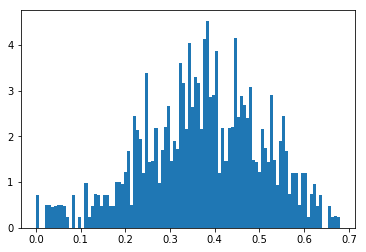

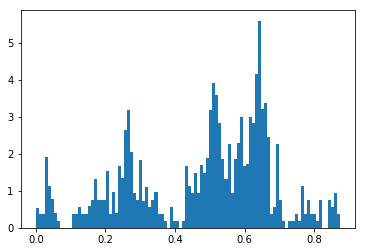

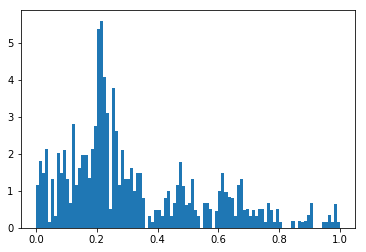

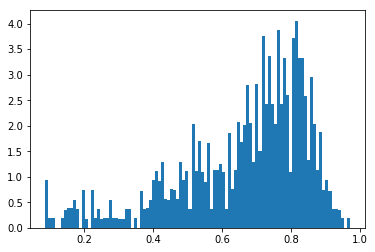

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA



print (hazards.shape)
for j in range(4):
    z=hazards[:,j]

    
    plt.hist(z,density=True,bins=100)
    
    

    plt.show()